# 1. Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# 2. Turning the datasets into DataFrame forms

In [2]:
# turning csv into DataFrame
olist_customer_df = pd.read_csv('olist_customers_dataset.csv')
olist_orders_df = pd.read_csv('olist_orders_dataset.csv')
olist_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products_df = pd.read_csv('olist_products_dataset.csv')
olist_sellers_df = pd.read_csv('olist_sellers_dataset.csv')

# 2.1 An Overview from the Data

In [3]:
# Put all the dataframes into a list
dataset_list = [olist_customer_df, olist_orders_df, 
                olist_order_items_df, olist_order_payments_df, olist_order_reviews_df, olist_products_df, olist_sellers_df]
# put all datasets' names into a list
dataset_name_list = ["olist_customer", "olist_orders", 
                     "olist_order_items", "olist_order_payments", "olist_order_reviews","olist_products", "olist_sellers"]
# Find out if there are some duplicates in any dataset
for i in dataset_list:
    print(i.duplicated().value_counts())

False    99441
dtype: int64
False    99441
dtype: int64
False    112650
dtype: int64
False    103886
dtype: int64
False    99224
dtype: int64
False    32951
dtype: int64
False    3095
dtype: int64


In [4]:
# create a DataFrame to have an overview for each dataset
n_rows_list = []
n_cols_list = []
null_amount_list = []
n_null_columns_list = []
null_columns_list = []
for df in dataset_list:
    n_rows_list.append(len(df.index))
    n_cols_list.append(len(df.columns))
    null_amount_list.append(df.isna().sum().sum())
    n_null_columns_list.append(len(df.columns[df.isna().any()].tolist()))
    null_columns_list.append(df.columns[df.isna().any()].tolist())
d = {"dataset" : dataset_name_list,
    "n_rows": n_rows_list, 
     "n_cols_list": n_cols_list,
     "null_amount" : null_amount_list,
     "n_null_columns" : n_null_columns_list,
     "null_columns" : null_columns_list
    }
overview_df = pd.DataFrame(data=d)
overview_df

,dataset,n_rows,n_cols_list,null_amount,n_null_columns,null_columns
0,olist_customer,99441,5,0,0,[]
1,olist_orders,99441,8,4908,3,"[order_approved_at, order_delivered_carrier_da..."
2,olist_order_items,112650,7,0,0,[]
3,olist_order_payments,103886,5,0,0,[]
4,olist_order_reviews,99224,7,145903,2,"[review_comment_title, review_comment_message]"
5,olist_products,32951,9,2448,8,"[product_category_name, product_name_lenght, p..."
6,olist_sellers,3095,4,0,0,[]


The table indicates that there are missing values in three datasets, including olist_orders, olist_order_reviews, and olist_products. 

# 3. Exploratory Data Analysis

# 3.1. Total Orders on E-Commerce

* How many orders do we have for each status?

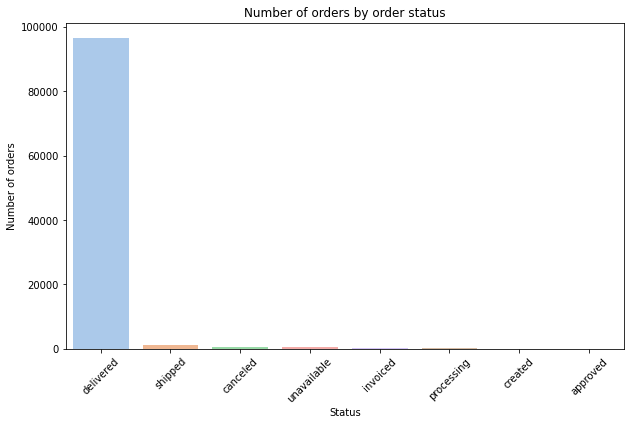

In [5]:
olist_order_status_df = olist_orders_df.groupby(["order_status"]).count()\
.reset_index()\
.sort_values("order_id", ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(data=olist_order_status_df, x="order_status", y ="order_id",
           palette = "pastel")
plt.xticks(rotation = 45)
plt.xlabel("Status")
plt.ylabel("Number of orders")
plt.title("Number of orders by order status")
plt.show()

By the time this dataset was published, most orders were delivered.

# 3.2. E-Commerce Around Brazil

In [6]:
# covert to datetime
for i in range(3,8):
    olist_orders_df.iloc[:,i] = pd.to_datetime(olist_orders_df.iloc[:,i])
# add columns for different forms of time
olist_orders_df['order_purchase_year'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%Y')
olist_orders_df['order_purchase_month'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%-m')
olist_orders_df['order_purchase_month_name'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%h')
olist_orders_df['order_purchase_year_month']= olist_orders_df['order_purchase_year'] + olist_orders_df['order_purchase_timestamp'].dt.strftime('%m')
olist_orders_df['order_purchase_day'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%-d')
olist_orders_df['order_purchase_date'] = olist_orders_df['order_purchase_year'] + olist_orders_df['order_purchase_month'] + olist_orders_df['order_purchase_day']
olist_orders_df['order_purchase_dayofweek'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%w')
olist_orders_df['order_purchase_dayofweek_name'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%a')
olist_orders_df['order_purchase_hour'] = olist_orders_df['order_purchase_timestamp'].dt.hour
olist_orders_df['order_purchase_time_day'] = olist_orders_df['order_purchase_timestamp'].dt.strftime('%p')
olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_purchase_year            99441 non-null  object        
 9   order_purchase_month           99441 non-null  object        
 10  order_purchase_month_name      99441 non-null  object        
 11  order_purchase_

In [7]:
#add periods, including morning, afternoon, evening, night to the DataFrame
period_list = []
for index, row in olist_orders_df.iterrows():
    if row['order_purchase_hour'] >= 0 and row['order_purchase_hour'] < 6:
        period_list.append("Night")
    elif row['order_purchase_hour'] >= 6 and row['order_purchase_hour'] < 12:
        period_list.append("Morning")
    elif row['order_purchase_hour'] >= 12 and row['order_purchase_hour'] < 18:
        period_list.append("Afternoon")
    else:
        period_list.append("Evening")
olist_orders_df["period_of_day"] = period_list
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_day,order_purchase_date,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,period_of_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,2,2017102,1,Mon,10,AM,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,24,2018724,2,Tue,20,PM,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,8,201888,3,Wed,8,AM,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,18,20171118,6,Sat,19,PM,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,13,2018213,2,Tue,21,PM,Evening


* An overview of orders by city

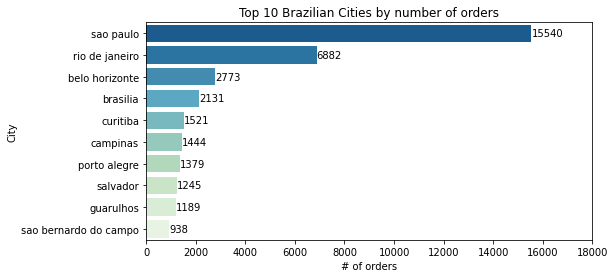

In [8]:
# merge the orders data to order_items data
olist_orders_customers_df = olist_orders_df.merge(olist_customer_df, how='left', on="customer_id")
# count how many orders there are in each city
city_df = olist_orders_customers_df.groupby(["customer_city"]).agg('count')\
.reset_index()\
.sort_values("order_id", ascending=False)\
.reset_index()\
.rename(columns={"order_id": "count"})
# select the top 10 cities with the most orders
top_10_cities_df = city_df.iloc[:10, :]
# create a Horizontal Bar Plot for the top 10 cities
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=top_10_cities_df, x="count", y ="customer_city", 
            palette="GnBu_r")
plt.xlabel("# of orders")
plt.xticks(np.arange(0, 19000, step=2000))
plt.ylabel("City")
plt.title("Top 10 Brazilian Cities by number of orders")
ax.bar_label(ax.containers[0])
plt.show()

* An overview of orders by state

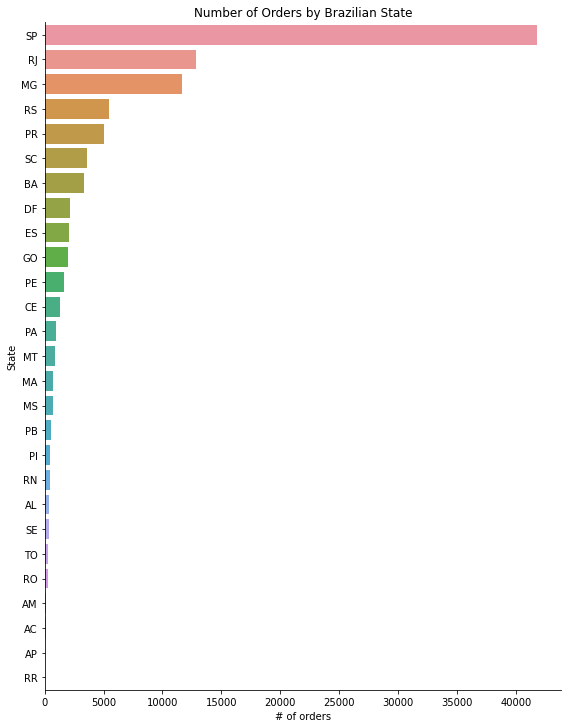

In [9]:
state_df = olist_orders_customers_df.groupby(["customer_state"]).agg('count')[["order_id"]]\
.reset_index()\
.sort_values("order_id", ascending=False)\
.reset_index()\
.rename(columns={"order_id": "count"})
state_df
sns.catplot(data=state_df, x="count", y="customer_state", kind="bar", height=10, aspect=0.8)
plt.xlabel("# of orders")
plt.ylabel("State")
plt.title("Number of Orders by Brazilian State")
plt.show()

* On what period of the day, people tend to purchase things online in Brazil?

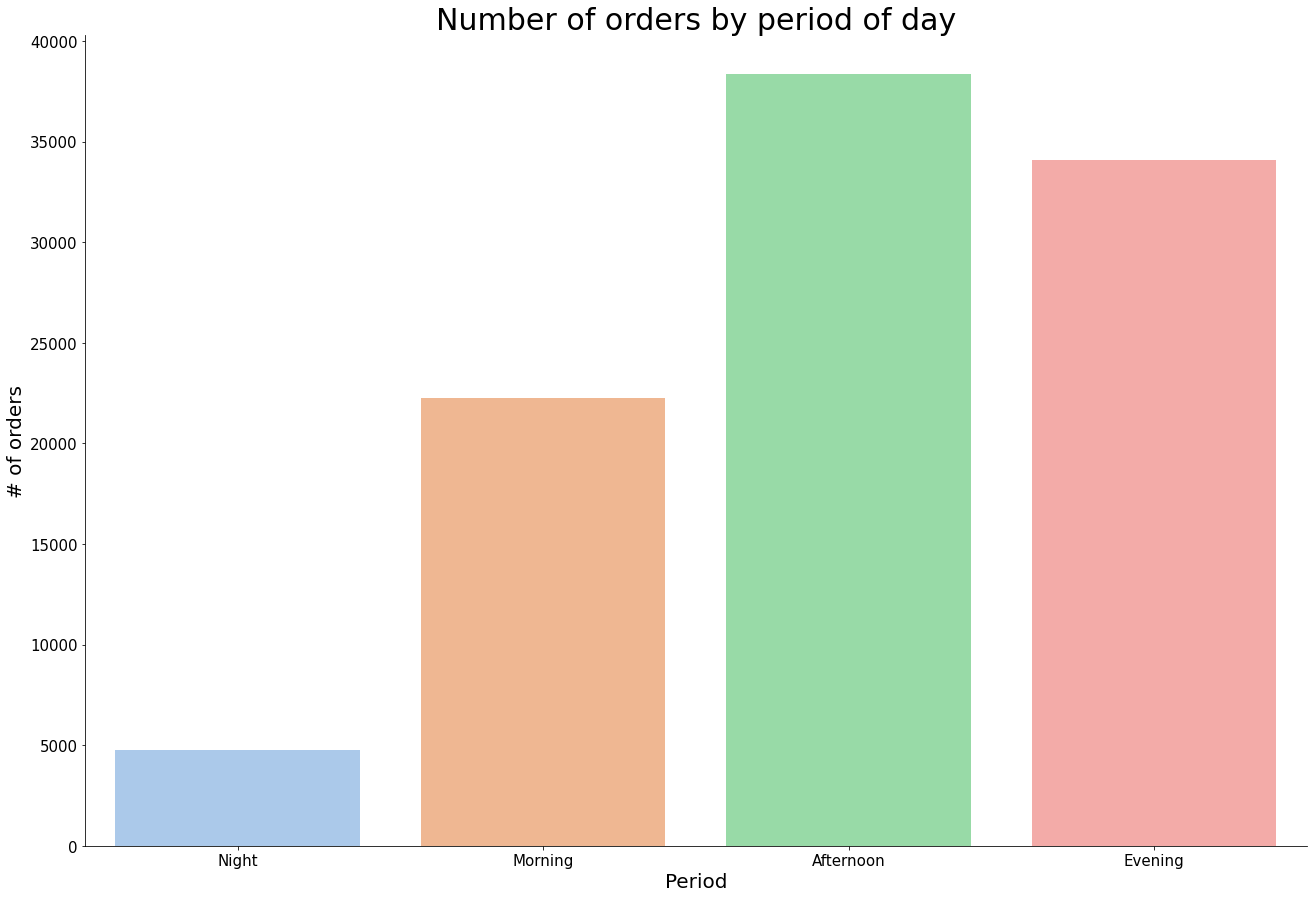

In [10]:
sns.catplot(olist_orders_customers_df, x="period_of_day", kind="count", 
            height=12, aspect=1.5, palette='pastel', order = ["Night", "Morning", "Afternoon", "Evening"])
plt.xlabel("Period", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("# of orders", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Number of orders by period of day", fontsize=30)
plt.show()

* On what day of the week, people tend to purchase things online in Brazil?

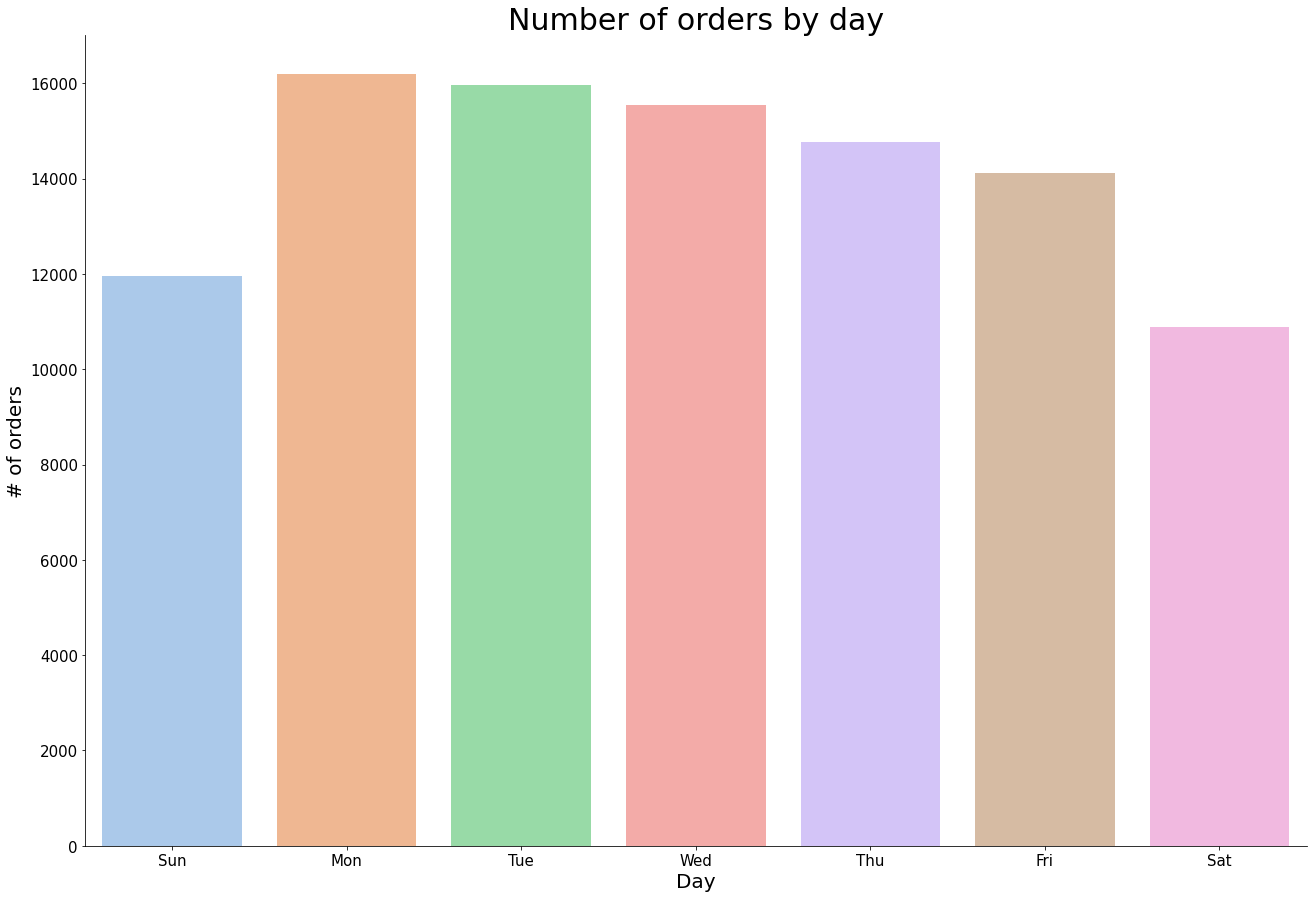

In [11]:
sns.catplot(olist_orders_customers_df, x="order_purchase_dayofweek_name", kind="count", 
            height=12, aspect=1.5, palette='pastel',
           order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel("Day", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("# of orders", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Number of orders by day", fontsize=30)
plt.show()

* In what month, people tend to purchase things online in Brazil?

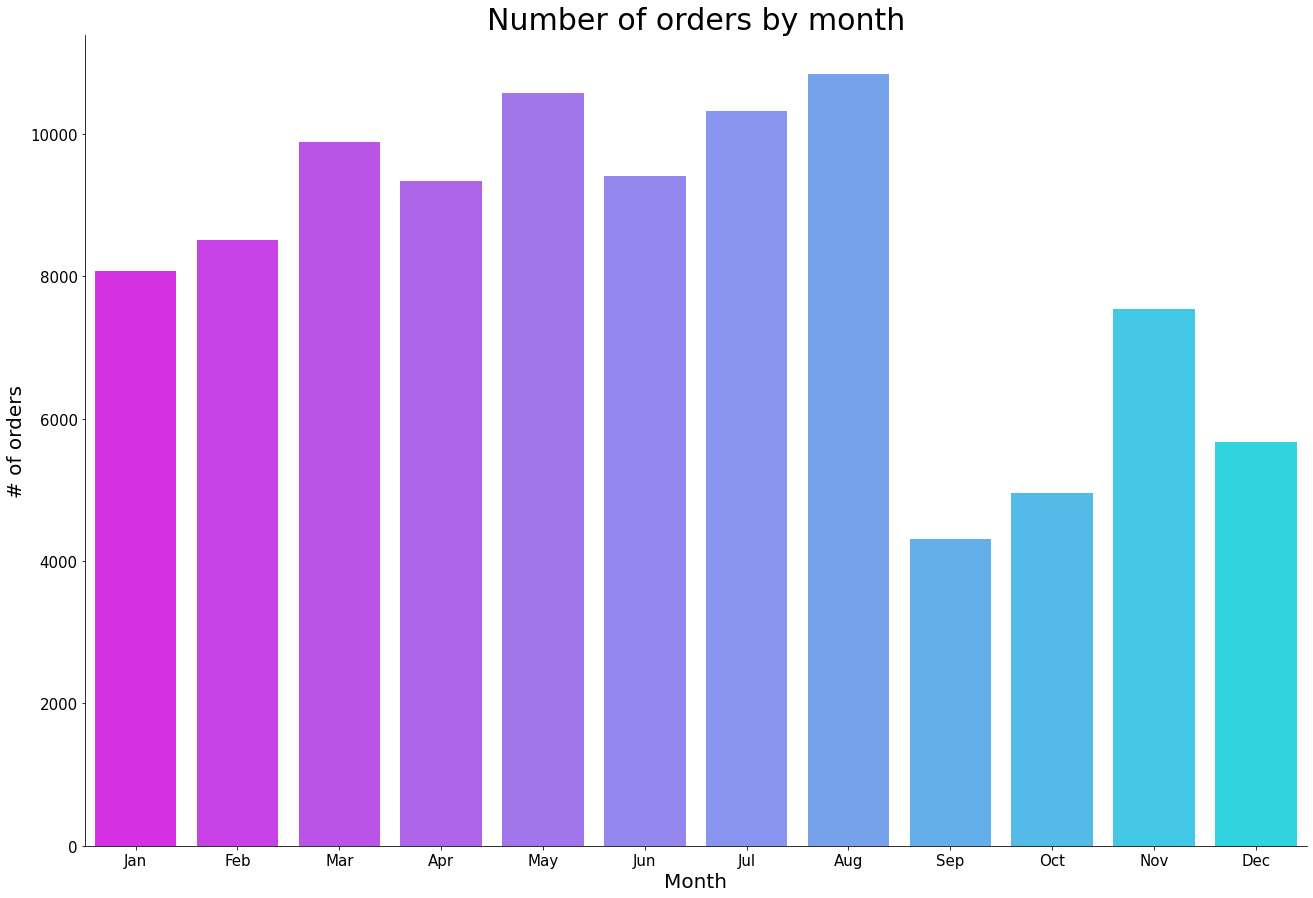

In [12]:
sns.catplot(olist_orders_customers_df, x="order_purchase_month_name", kind="count", 
            height=12, aspect=1.5, palette="cool_r",
           order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                  "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("# of orders", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Number of orders by month", fontsize=30)
plt.show()

# 3.3. Payment types for Brazilian E-Commerce

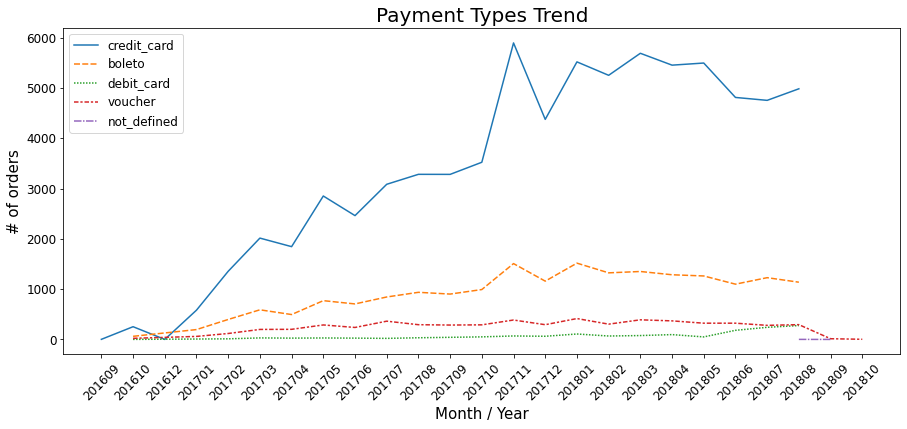

In [13]:
# merge the payment data to order_items data
olist_orders_payments_df = olist_orders_df.merge(olist_order_payments_df, how='left', on="order_id")
# count the payment type by month, year
olist_orders_payment_methods_time_df = olist_orders_payments_df.groupby(["order_purchase_year_month", "payment_type"])\
.agg("count")\
.sort_values("order_purchase_year_month", ascending=True)\
.reset_index()\
.rename(columns={"order_id": "count"})
plt.figure(figsize=(15, 6))
sns.lineplot(data=olist_orders_payment_methods_time_df, x="order_purchase_year_month", y="count",
            hue = "payment_type", style = "payment_type")
plt.xlabel("Month / Year", fontsize=15)
plt.xticks(rotation = 45, fontsize=12)
plt.ylabel("# of orders", fontsize=15)
plt.yticks(fontsize=12)
plt.legend(loc = 'upper left', fontsize=12)
plt.title("Payment Types Trend", fontsize=20)
plt.show()

According to the line chart above, it shows that payments made by credit card is the majority for e-commerce in Brazil. In addition, from March in 2018, there is a little decrease on this kind of payment. On the other hand, payments made by debit card has increased since May in 2018.